In [ ]:
!pip install yfinance

In [2]:
%cd /content/drive/MyDrive/MasterThesis/Data

/content/drive/MyDrive/MasterThesis/Data


In [3]:
import pandas as pd
import numpy as np
import requests

import yfinance as yf
from datetime import datetime

In [ ]:
reports = pd.read_csv("./cleaned_dax_reports.csv")

In [ ]:
symbols = reports["symbol"].dropna().unique()

In [ ]:
symbols

array(['BEI', 'DTE', 'VNA', 'MRK', 'MTX', 'EOAN', 'RWE', 'HEI', 'SIE',
       'LIN', 'QIA', 'HNK', 'DAI', 'CON', 'BAYN', 'VOW3', 'FRE', 'SY1',
       'SRT', 'PAH3', 'SAP', 'ADS', 'DBK', 'PUM', 'SHL', 'AIR', '1COV',
       'ALV', 'IFX', 'BMW', 'HNR1', 'ENR', 'ZAL', 'MUV2', 'DPW', 'BAS',
       'DB1', 'BNR'], dtype=object)

In [ ]:
len(symbols)

38

In [ ]:
# for downloading market data
# for symbol in symbols:
#     symbol_with_suffix = f"{symbol}.DE"  # Append ".DE" to the symbol
#     df = yf.download(symbol_with_suffix, start=datetime(2021, 1, 1), end=datetime(2021, 1, 1))

# Pull ESG scores from Yahoo Finance

In [ ]:
# Endpoint
url = "https://query2.finance.yahoo.com/v1/finance/esgChart"

# List of dataframes
dataframes = []

for symbol in symbols:
    symbol_with_suffix = f"{symbol}.DE"  # Append ".DE" to the symbol
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    response = requests.get(url, params={"symbol": symbol_with_suffix}, headers=headers)
    if response.ok:
        print(f"Processing response for {symbol}")
        esg_data = response.json().get("esgChart", {}).get("result", [{}])
        if esg_data and esg_data[0]:  # Ensure there's at least one non-empty result
            df = pd.DataFrame(esg_data[0].get("symbolSeries", []))

            if not df.empty:  # Proceed only if the DataFrame is not empty
                df["symbol"] = symbol  # Add symbol column to identify the company
                dataframes.append(df)
            else:
                print(f"No ESG data available for {symbol}")

        else:
            print(f"Invalid or empty ESG data for {symbol}")

    else:
        print(f"Failed to fetch data for {symbol}, status code: {response.status_code}")

# Combine all data into a single dataframe, if any data was retrieved
if dataframes:
    df = pd.concat(dataframes)

    # Convert 'timestamp' column from Unix time to datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

    # 1. Filter rows where 'timestamp' is from January 2021 onwards
    df_filtered = df[(df["timestamp"] >= "2021-01-01") & (df["timestamp"] <= "2022-12-01")]

    # 2. Drop rows where any ESG scores (e.g., 'esgScore', 'environmentScore', 'socialScore', 'governanceScore') are missing
    df_filtered = df_filtered.dropna(subset=["esgScore", "environmentScore", "socialScore", "governanceScore"])

else:
    print("No valid data to process.")

Processing response for BEI
Processing response for DTE
Processing response for VNA
Processing response for MRK
Processing response for MTX
Processing response for EOAN
Processing response for RWE
Processing response for HEI
Processing response for SIE
Processing response for LIN
Processing response for QIA
Processing response for HNK
Invalid or empty ESG data for HNK
Processing response for DAI
Processing response for CON
Processing response for BAYN
Processing response for VOW3
Processing response for FRE
Processing response for SY1
Processing response for SRT
Invalid or empty ESG data for SRT
Processing response for PAH3
Processing response for SAP
Processing response for ADS
Processing response for DBK
Processing response for PUM
Invalid or empty ESG data for PUM
Processing response for SHL
Invalid or empty ESG data for SHL
Processing response for AIR
Processing response for 1COV
Processing response for ALV
Processing response for IFX
Processing response for BMW
Processing response

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 76 to 95
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         252 non-null    datetime64[ns]
 1   esgScore          252 non-null    float64       
 2   governanceScore   252 non-null    float64       
 3   environmentScore  252 non-null    float64       
 4   socialScore       252 non-null    float64       
 5   symbol            252 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 13.8+ KB


In [ ]:
df_filtered.head(20)

,timestamp,esgScore,governanceScore,environmentScore,socialScore,symbol
76,2021-01-01,23.10,7.80,8.06,7.24,BEI
77,2021-02-01,24.13,7.74,8.36,8.03,BEI
78,2021-03-01,24.13,7.74,8.36,8.03,BEI
80,2021-05-01,24.06,7.74,8.29,8.03,BEI
84,2021-09-01,24.06,7.74,8.29,8.03,BEI
89,2022-02-01,28.97,7.88,8.71,12.38,BEI
92,2022-05-01,28.97,7.88,8.71,12.38,BEI
95,2022-08-01,28.97,7.88,8.71,12.38,BEI
76,2021-01-01,16.71,7.17,2.18,7.36,DTE
77,2021-02-01,16.42,6.88,2.18,7.36,DTE


In [ ]:
# Extract year from the 'timestamp' column
df_filtered['year'] = df_filtered['timestamp'].dt.year

# Sort the dataframe by 'symbol', 'year', and 'timestamp' to ensure last date is at the bottom
df_filtered = df_filtered.sort_values(by=['symbol', 'year', 'timestamp'])

# Group by 'symbol' and 'year', then take the last entry for each group
last_date_scores = df_filtered.groupby(['symbol', 'year']).last().reset_index()

# Display the result
last_date_scores.head(10)


,symbol,year,timestamp,esgScore,governanceScore,environmentScore,socialScore
0,1COV,2021,2021-09-01,18.34,5.56,10.29,2.49
1,1COV,2022,2022-08-01,21.13,6.17,11.44,3.51
2,ADS,2021,2021-05-01,13.88,7.29,2.18,4.40
3,ADS,2022,2022-08-01,13.46,6.09,2.82,4.54
4,AIR,2021,2021-09-01,27.36,9.03,4.46,13.86
5,AIR,2022,2022-08-01,27.36,9.03,4.46,13.86
6,ALV,2021,2021-09-01,15.93,8.73,0.77,6.43
7,ALV,2022,2022-08-01,16.72,8.18,0.52,8.02
8,BAS,2021,2021-09-01,25.76,8.90,11.25,5.61
9,BAS,2022,2022-08-01,28.11,8.38,12.82,6.90


In [ ]:
last_date_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   symbol            64 non-null     object        
 1   year              64 non-null     int32         
 2   timestamp         64 non-null     datetime64[ns]
 3   esgScore          64 non-null     float64       
 4   governanceScore   64 non-null     float64       
 5   environmentScore  64 non-null     float64       
 6   socialScore       64 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 3.4+ KB


In [ ]:
last_date_scores['symbol'].unique()

array(['1COV', 'ADS', 'AIR', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'BNR',
       'CON', 'DAI', 'DB1', 'DBK', 'DPW', 'DTE', 'EOAN', 'FRE', 'HEI',
       'HNR1', 'IFX', 'MRK', 'MTX', 'MUV2', 'PAH3', 'QIA', 'RWE', 'SAP',
       'SIE', 'SY1', 'VNA', 'VOW3', 'ZAL'], dtype=object)

In [ ]:
for symbol in symbols:
    if symbol not in last_date_scores['symbol'].unique():
        print(symbol)

LIN
HNK
SRT
PUM
SHL
ENR


In [ ]:
last_date_scores.to_csv('esg_yearly_scores.csv', index=False)

# Load ESG scores and analyse

In [46]:
esg_scores = pd.read_csv("./esg_yearly_scores.csv")

In [5]:
esg_scores.head()

,symbol,year,timestamp,esgScore,governanceScore,environmentScore,socialScore
0,1COV,2021,2021-09-01,18.34,5.56,10.29,2.49
1,1COV,2022,2022-08-01,21.13,6.17,11.44,3.51
2,ADS,2021,2021-05-01,13.88,7.29,2.18,4.40
3,ADS,2022,2022-08-01,13.46,6.09,2.82,4.54
4,AIR,2021,2021-09-01,27.36,9.03,4.46,13.86


In [43]:
company_symbol = pd.read_csv("company_symbol.csv")

In [44]:
company_symbol.head()

,company,symbol
0,Beiersdorf AG,BEI
1,Deutsche Telekom AG,DTE
2,Vonovia SE,VNA
3,Merck KGaA,MRK
4,MTU,MTX


In [47]:
esg_scores = esg_scores.merge(company_symbol, on='symbol')
esg_scores.head()

,symbol,year,timestamp,esgScore,governanceScore,environmentScore,socialScore,company
0,1COV,2021,2021-09-01,18.34,5.56,10.29,2.49,Covestro AG
1,1COV,2022,2022-08-01,21.13,6.17,11.44,3.51,Covestro AG
2,ADS,2021,2021-05-01,13.88,7.29,2.18,4.40,Adidas AG
3,ADS,2022,2022-08-01,13.46,6.09,2.82,4.54,Adidas AG
4,AIR,2021,2021-09-01,27.36,9.03,4.46,13.86,Airbus SE


In [34]:
esg_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            64 non-null     object 
 1   year              64 non-null     int64  
 2   timestamp         64 non-null     object 
 3   esgScore          64 non-null     float64
 4   governanceScore   64 non-null     float64
 5   environmentScore  64 non-null     float64
 6   socialScore       64 non-null     float64
 7   company           64 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ KB


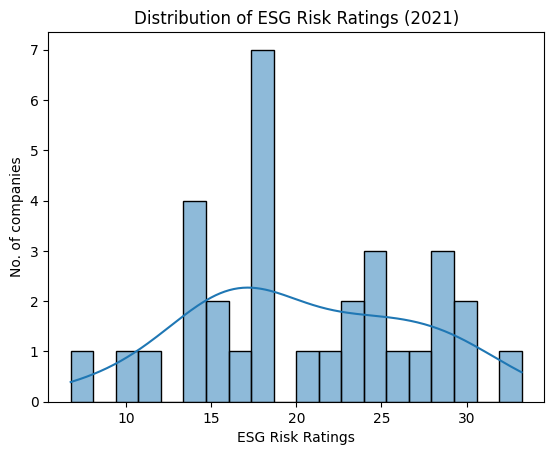

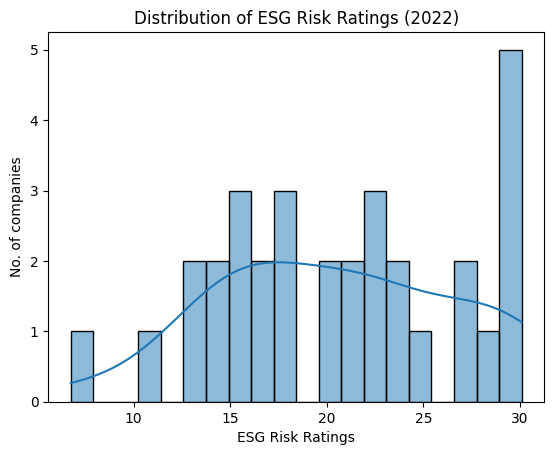

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

esg_scores_2021 = esg_scores[esg_scores['year'] == 2021]
esg_scores_2022 = esg_scores[esg_scores['year'] == 2022]

# Plot the histogram for 2021
sns.histplot(esg_scores_2021["esgScore"], bins=20, kde= True)
plt.xlabel('ESG Risk Ratings')
plt.ylabel('No. of companies')
plt.title('Distribution of ESG Risk Ratings (2021)')
plt.show()

# Plot the histogram for 2022
sns.histplot(esg_scores_2022["esgScore"], bins=20, kde= True)
plt.xlabel('ESG Risk Ratings')
plt.ylabel('No. of companies')
plt.title('Distribution of ESG Risk Ratings (2022)')
plt.show()

# Load and analyse greenwashing scores

In [10]:
greenwashing_scores_2021 = pd.read_csv("greenwashing_likelihood_scores_2021.csv")
greenwashing_scores_2022 = pd.read_csv("greenwashing_likelihood_scores_2022.csv")

In [11]:
greenwashing_scores_2021[greenwashing_scores_2021['greenwashing_score'].isna()]

,company,year,SDG_max_greenwashing_likelihood,relevant_sdgs,internal_indicators,discrepancy_indicators,greenwashing_score
21,Covestro AG,2021,NaN,NaN,{},{},NaN
27,Muenchener Rueckversicherungs Gesellschaft AGi...,2021,NaN,NaN,{},{},NaN


In [12]:
greenwashing_scores_2022[greenwashing_scores_2022['greenwashing_score'].isna()]

,company,year,SDG_max_greenwashing_likelihood,relevant_sdgs,internal_indicators,discrepancy_indicators,greenwashing_score
27,Muenchener Rueckversicherungs Gesellschaft AGi...,2022,NaN,NaN,{},{},NaN


In [13]:
# Remove rows where greenwashing_score is NaN
greenwashing_scores_2021.dropna(subset=['greenwashing_score'], inplace=True)
greenwashing_scores_2022.dropna(subset=['greenwashing_score'], inplace=True)

In [14]:
greenwashing_scores_2021.head()

,company,year,SDG_max_greenwashing_likelihood,relevant_sdgs,internal_indicators,discrepancy_indicators,greenwashing_score
0,Beiersdorf AG,2021,Responsible Consumption and Production,Quality Education; Responsible Consumption and...,"{""Quality Education"": {""indicators"": [{""indica...","{""Responsible Consumption and Production"": {""d...",2.99
1,Deutsche Telekom AG,2021,Partnerships for the Goals,Good Health and Well-being; Gender Equality; A...,"{""Good Health and Well-being"": {""indicators"": ...","{""Affordable and Clean Energy"": {""discrepancie...",1.97
2,Vonovia SE,2021,Sustainable Cities and Communities,Affordable and Clean Energy; Decent Work and E...,"{""Affordable and Clean Energy"": {""indicators"":...","{""Affordable and Clean Energy"": {""discrepancie...",1.96
3,Merck KGaA,2021,Good Health and Well-being,Good Health and Well-being; Quality Education;...,"{""Good Health and Well-being"": {""indicators"": ...","{""Good Health and Well-being"": {""discrepancies...",3.12
4,MTU,2021,Affordable and Clean Energy,Gender Equality; Clean Water and Sanitation; A...,"{""Gender Equality"": {""indicators"": [{""indicato...",{},3.67


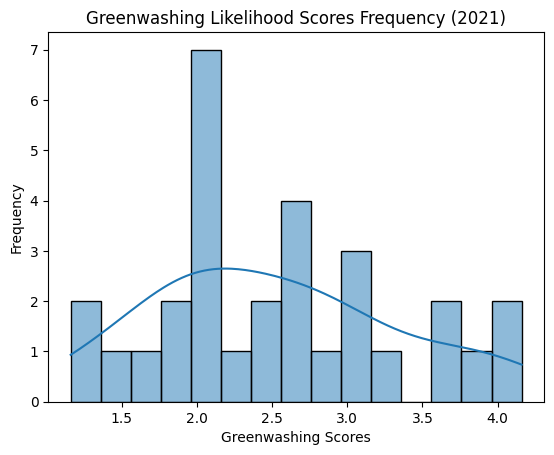

In [15]:
# Plot the histogram
sns.histplot(greenwashing_scores_2021['greenwashing_score'], bins=15, kde= True)
plt.xlabel('Greenwashing Scores')
plt.ylabel('Frequency')
plt.title('Greenwashing Likelihood Scores Frequency (2021)')
plt.show()

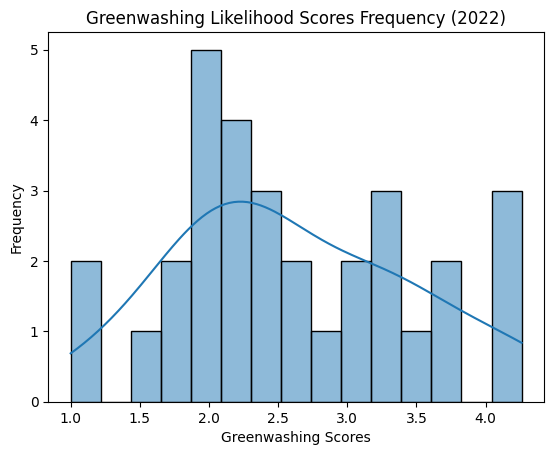

In [16]:
# Plot the histogram
sns.histplot(greenwashing_scores_2022['greenwashing_score'], bins=15, kde= True)
plt.xlabel('Greenwashing Scores')
plt.ylabel('Frequency')
plt.title('Greenwashing Likelihood Scores Frequency (2022)')
plt.show()

In [17]:
# Concatenate the greenwashing scores for 2021 and 2022
greenwashing_scores = pd.concat([greenwashing_scores_2021, greenwashing_scores_2022])

# Merge the ESG scores and greenwashing scores on 'company' and 'year'
merged_df = pd.merge(esg_scores, greenwashing_scores, on=['company', 'year'], how='inner')
len(merged_df)

61

In [18]:
# Calculate the correlation between `esgScore` and `greenwashing_score`
correlation = merged_df['esgScore'].corr(merged_df['greenwashing_score'])

print(f"The correlation between esgScore and greenwashing_score is: {correlation.round(2)}")

The correlation between esgScore and greenwashing_score is: 0.63


In [19]:
# Top 3 companies with the highest greenwashing_score
top_5_2021 = greenwashing_scores_2021.nlargest(5, 'greenwashing_score')
top_5_2022 = greenwashing_scores_2022.nlargest(5, 'greenwashing_score')

# Bottom 5 companies with the lowest greenwashing_score
bottom_5_2021 = greenwashing_scores_2021.nsmallest(5, 'greenwashing_score')
bottom_5_2022 = greenwashing_scores_2022.nsmallest(5, 'greenwashing_score')

In [20]:
top_5_2021[["company", "year", "greenwashing_score"]].head()

,company,year,greenwashing_score
13,Volkswagen AG,2021,4.16
12,Bayer AG,2021,4.01
6,RWE AG,2021,3.86
4,MTU,2021,3.67
8,Siemens AG,2021,3.65


In [21]:
top_5_2022[["company", "year", "greenwashing_score"]].head()

,company,year,greenwashing_score
13,Volkswagen AG,2022,4.26
19,Deutsche Bank AG,2022,4.23
12,Bayer AG,2022,4.16
16,Porsche,2022,3.67
24,BMW,2022,3.64


In [22]:
bottom_5_2021[["company", "year", "greenwashing_score"]].head()

,company,year,greenwashing_score
14,Fresenius,2021,1.16
31,Brenntag,2021,1.25
11,Continental AG,2021,1.45
30,Deutsche Boerse AG,2021,1.57
17,SAP,2021,1.79


In [23]:
bottom_5_2022[["company", "year", "greenwashing_score"]].head()

,company,year,greenwashing_score
2,Vonovia SE,2022,1.00
28,Deutsche Post AG,2022,1.21
25,Hannover R AG,2022,1.54
9,Qiagen,2022,1.66
29,BASF SE,2022,1.69


In [35]:
# Ensure 'company' column is a string and handle missing values
merged_df['symbol'] = merged_df['symbol'].astype(str)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   symbol                           61 non-null     object 
 1   year                             61 non-null     int64  
 2   timestamp                        61 non-null     object 
 3   esgScore                         61 non-null     float64
 4   governanceScore                  61 non-null     float64
 5   environmentScore                 61 non-null     float64
 6   socialScore                      61 non-null     float64
 7   company                          61 non-null     object 
 8   SDG_max_greenwashing_likelihood  61 non-null     object 
 9   relevant_sdgs                    61 non-null     object 
 10  internal_indicators              61 non-null     object 
 11  discrepancy_indicators           61 non-null     object 
 12  greenwashing_score      

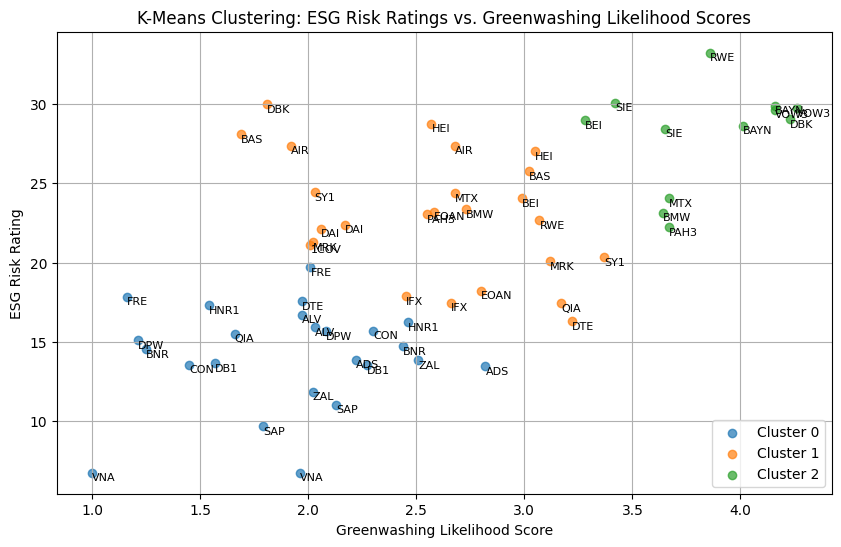

In [55]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster

# Step 1: Select relevant columns for clustering from merged df of ESG scores and greenwashing scores
data = merged_df[['esgScore', 'greenwashing_score']].copy()

# Step 2: Normalize the data (optional but recommended for clustering)
data_normalized = (data - data.min()) / (data.max() - data.min())

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters
kmeans_labels = kmeans.fit_predict(data_normalized)
merged_df['kmeans_cluster'] = kmeans_labels

# Step 4: Calculate averages for each cluster
cluster_averages = merged_df.groupby('kmeans_cluster')[['greenwashing_score', 'esgScore']].mean().round(2)
cluster_averages.reset_index(inplace=True)
cluster_averages.rename(columns={
    'kmeans_cluster': 'Cluster',
    'greenwashing_score': 'Avg Greenwashing Score',
    'esgScore': 'Avg ESG Score'
}, inplace=True)

# Step 5: 2D Plot of Clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(kmeans_labels):
    cluster_data = data[kmeans_labels == cluster]
    plt.scatter(
        cluster_data['greenwashing_score'],
        cluster_data['esgScore'],
        label=f"Cluster {cluster}",
        alpha = 0.7
    )
# Add company names as labels on each point
for idx, row in merged_df.iterrows():
    plt.text(
        row['greenwashing_score'],
        row['esgScore'],
        row['symbol'],
        fontsize=8,
        ha='left',
        va='top'
    )

plt.title('K-Means Clustering: ESG Risk Ratings vs. Greenwashing Likelihood Scores')
plt.xlabel('Greenwashing Likelihood Score')
plt.ylabel('ESG Risk Rating')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [56]:
cluster_averages

,Cluster,Avg Greenwashing Score,Avg ESG Score
0,0,1.91,14.19
1,1,2.58,22.97
2,2,3.83,28.09


                            OLS Regression Results                            
Dep. Variable:               esgScore   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     38.85
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           5.29e-08
Time:                        13:33:52   Log-Likelihood:                -184.39
No. Observations:                  61   AIC:                             372.8
Df Residuals:                      59   BIC:                             377.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.0353      2

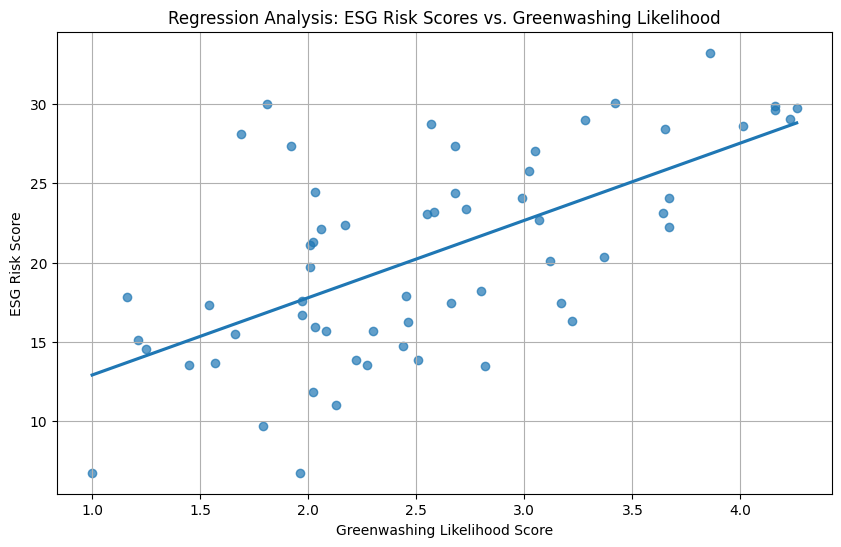

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Select the independent (X) and dependent (y) variables
X = merged_df['greenwashing_score']  # Independent variable
y = merged_df['esgScore']  # Dependent variable

# Add a constant to the independent variable for regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Plot the regression results
plt.figure(figsize=(10, 6))
sns.regplot(x='greenwashing_score', y='esgScore', data=merged_df, ci=None, scatter_kws={'alpha': 0.7})
plt.title('Regression Analysis: ESG Risk Scores vs. Greenwashing Likelihood')
plt.xlabel('Greenwashing Likelihood Score')
plt.ylabel('ESG Risk Score')
plt.grid(True)
plt.show()
